In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
import os
import seaborn as sns
import random 
import dask
import babet as bb
from moarpalettes import get_palette
from cartopy import crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patches as patches
from cmcrameri import cm
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FuncFormatter, ScalarFormatter
from moarpalettes import get_palette

sns.set_theme(style="white")
sns.set_style("white")

random.seed(10)
# inidates = ['2023-10-11', '2023-10-15', '2023-10-17']
inidates = ['2023-10-15', '2023-10-17']
experiments = ['pi', 'curr', 'incr']

dask.config.set(**{'array.slicing.split_large_chunks': True})

In [2]:
color_palette = get_palette.Petroff6().to_sn_palette()
color_palette

[(0.3411764705882353, 0.5647058823529412, 0.9882352941176471),
 (0.9725490196078431, 0.611764705882353, 0.12549019607843137),
 (0.8941176470588236, 0.1450980392156863, 0.21176470588235294),
 (0.5882352941176471, 0.2901960784313726, 0.5450980392156862),
 (0.611764705882353, 0.611764705882353, 0.6313725490196078),
 (0.47843137254901963, 0.12941176470588237, 0.8666666666666667)]

In [3]:
# Plot settings
uk = [-10.5, 9.5, 45.5, 61.3] # longitude min, longitude max, latitude min, latitude max
northsea = [-17, 20, 40, 70]

# RACMO analogues

## Load data

In [11]:
racmo_msl, _ = bb.data.Data.get_racmo_indiv_analogues() # Don't need precip here

Importing data from pre-existing file


In [13]:
# check if file exists
if not os.path.exists('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/RACMO_analogues/RACMO_analogues_dynamics_latf.nc'): 
    # qvi
    tmp1 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/RACMO_analogues/analogs_Babet_A20231020_KNMI_RACMO__qvi__1951-1980_3dy_ave.nc').swap_dims({'time': 'ana'}).expand_dims(climate=["1950"])
    tmp2 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/RACMO_analogues/analogs_Babet_A20231020_KNMI_RACMO__qvi__1991-2020_3dy_ave.nc').swap_dims({'time': 'ana'}).expand_dims(climate=["present"])
    tmp3 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/RACMO_analogues/analogs_Babet_A20231020_KNMI_RACMO__qvi__2071-2100_3dy_ave.nc').swap_dims({'time': 'ana'}).expand_dims(climate=["future1"])
    tmp4 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/RACMO_analogues/analogs_Babet_A20231020_KNMI_RACMO__qvi__2071-2100_3dy_ave.nc').swap_dims({'time': 'ana'}).expand_dims(climate=["future2"])

    tmp1_ = bb.data.Data.regrid_racmo(tmp1).rename_dims({'ana': 'member'})
    tmp2_ = bb.data.Data.regrid_racmo(tmp2).rename_dims({'ana': 'member'})
    tmp3_ = bb.data.Data.regrid_racmo(tmp3).rename_dims({'ana': 'member'})
    tmp4_ = bb.data.Data.regrid_racmo(tmp4).rename_dims({'ana': 'member'})
    racmo_qvi = xr.concat([tmp1_, tmp2_, tmp3_, tmp4_], dim="climate")

    # latf
    tmp1 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/RACMO_analogues/analogs_Babet_A20231020_KNMI_RACMO__latf__1951-1980_3dy_ave.nc').swap_dims({'time': 'ana'}).expand_dims(climate=["1950"])
    tmp2 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/RACMO_analogues/analogs_Babet_A20231020_KNMI_RACMO__latf__1991-2020_3dy_ave.nc').swap_dims({'time': 'ana'}).expand_dims(climate=["present"])
    tmp3 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/RACMO_analogues/analogs_Babet_A20231020_KNMI_RACMO__latf__2071-2100_3dy_ave.nc').swap_dims({'time': 'ana'}).expand_dims(climate=["future1"])
    tmp4 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/RACMO_analogues/analogs_Babet_A20231020_KNMI_RACMO__latf__2071-2100_3dy_ave.nc').swap_dims({'time': 'ana'}).expand_dims(climate=["future2"])

    tmp1_ = bb.data.Data.regrid_racmo(tmp1).rename_dims({'ana': 'member'})
    tmp2_ = bb.data.Data.regrid_racmo(tmp2).rename_dims({'ana': 'member'})
    tmp3_ = bb.data.Data.regrid_racmo(tmp3).rename_dims({'ana': 'member'})
    tmp4_ = bb.data.Data.regrid_racmo(tmp4).rename_dims({'ana': 'member'})
    racmo_latf = xr.concat([tmp1_, tmp2_, tmp3_, tmp4_], dim="climate")

    # save to file
    racmo_latf.to_netcdf('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/RACMO_analogues/RACMO_analogues_dynamics_latf.nc')
    racmo_qvi.to_netcdf('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/RACMO_analogues/RACMO_analogues_dynamics_qvi.nc')
else:
    print('Importing data from pre-existing files')
    racmo_latf = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/RACMO_analogues/RACMO_analogues_dynamics_latf.nc')
    racmo_qvi = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/RACMO_analogues/RACMO_analogues_dynamics_qvi.nc')

Importing data from pre-existing files


In [14]:
racmo_latf = racmo_latf.mean(dim='member').compute()
racmo_qvi = racmo_qvi.mean(dim='member').compute()
racmo_msl = racmo_msl.mean(dim='member').compute()

## Plot

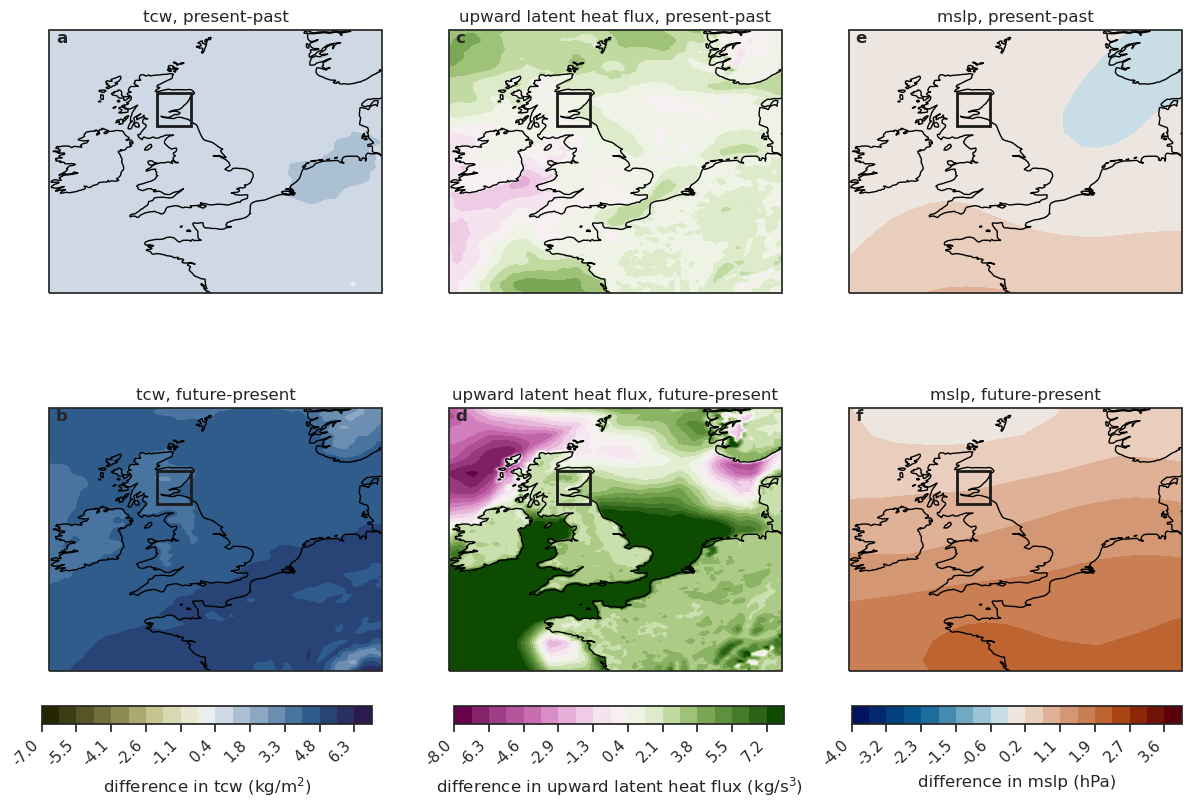

In [15]:
# Create figure
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(15, 9), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot saturation specific humidity
vmax = 7
plot1 = (racmo_qvi.sel(climate='present')-racmo_qvi.sel(climate='1950')).qvi.plot.contourf(
    cmap=cm.broc_r,vmin=-1*vmax, vmax=vmax,
    levels=20, ax=axes[0, 0], add_colorbar=False  # Disable individual colorbars
)
plot2 = (racmo_qvi.sel(climate='future1')-racmo_qvi.sel(climate='present')).qvi.plot.contourf(
    cmap=cm.broc_r, vmin=-1*vmax, vmax=vmax,
    levels=20, ax=axes[1, 0], add_colorbar=False  # Disable individual colorbars
)

# Plot vertical velocity
vmax = 8
plot3 = (racmo_latf.sel(climate='present')-racmo_latf.sel(climate='1950')).latf.plot.contourf(
    cmap=cm.bam, vmin=-1*vmax, vmax=vmax,
    levels=20, ax=axes[0,1], add_colorbar=False  # Disable individual colorbars
)
plot4 = (racmo_latf.sel(climate='future1')-racmo_latf.sel(climate='present')).latf.plot.contourf(
    cmap=cm.bam, vmin=-1*vmax, vmax=vmax,
    levels=20, ax=axes[1,1], add_colorbar=False  # Disable individual colorbars
)

# Plot mean sea level pressure
vmax = 4
plot5 = ((racmo_msl.sel(climate='present')-racmo_msl.sel(climate='1950')).msl/100).plot.contourf(
    cmap=cm.vik, vmin=-1*vmax, vmax=vmax,
    levels=20, ax=axes[0,2], add_colorbar=False  # Disable individual colorbars
)
plot6= ((racmo_msl.sel(climate='future1')-racmo_msl.sel(climate='present')).msl/100).plot.contourf(
    cmap=cm.vik, vmin=-1*vmax, vmax=vmax,
    levels=20, ax=axes[1,2], add_colorbar=False  # Disable individual colorbars
)

# Add horizontal colorbars
cbar_ax1 = fig.add_axes([0.12, 0.08, 0.22, 0.02])  # Bottom of first column
cbar1 = fig.colorbar(plot1, cax=cbar_ax1, orientation="horizontal", label="difference in tcw (kg/m$^2$)")
cbar1.ax.xaxis.set_label_position('bottom')
cbar1.formatter = FormatStrFormatter("%.1f")  # Restrict to 2 decimal places
cbar1.update_ticks()

cbar_ax2 = fig.add_axes([0.395, 0.08, 0.22, 0.02])  # Bottom of second column
cbar2 = fig.colorbar(plot3, cax=cbar_ax2, orientation="horizontal", label=r"difference in upward latent heat flux (kg/s$^3$)")
cbar2.ax.xaxis.set_label_position('bottom')
cbar2.formatter = FormatStrFormatter("%.1f")  # Restrict to 2 decimal places
cbar2.update_ticks()

cbar_ax3 = fig.add_axes([0.66, 0.08, 0.22, 0.02])  # Bottom of third column
cbar3 = fig.colorbar(plot5, cax=cbar_ax3, orientation="horizontal", label="difference in mslp (hPa)")
cbar3.ax.xaxis.set_label_position('bottom')
cbar3.formatter = FormatStrFormatter("%.1f")  # Restrict to 2 decimal places
cbar3.update_ticks()

for cbar in [cbar1, cbar2, cbar3]:  
    for label in cbar.ax.get_xticklabels():  # For horizontal colorbars  
        label.set_rotation(45)  
        label.set_ha('right')  # Align labels to the right for better readability


# Add figure labels
axes[0, 0].text(0.02, 0.95, "a", transform=axes[0, 0].transAxes, fontsize=12, fontweight="bold")
axes[1, 0].text(0.02, 0.95, "b", transform=axes[1, 0].transAxes, fontsize=12, fontweight="bold")
axes[0, 1].text(0.02, 0.95, "c", transform=axes[0, 1].transAxes, fontsize=12, fontweight="bold")
axes[1, 1].text(0.02, 0.95, "d", transform=axes[1, 1].transAxes, fontsize=12, fontweight="bold")
axes[0, 2].text(0.02, 0.95, "e", transform=axes[0, 2].transAxes, fontsize=12, fontweight="bold")
axes[1, 2].text(0.02, 0.95, "f", transform=axes[1, 2].transAxes, fontsize=12, fontweight="bold")

# Apply Cartopy settings to both axes
titles = [f"tcw, present-past", f"upward latent heat flux, present-past", f"mslp, present-past",
         f"tcw, future-present", f"upward latent heat flux, future-present",  f"mslp, future-present"]
for ax, title in zip(axes.flatten(), titles):
    ax.set_extent(uk, crs=ccrs.PlateCarree())  # Set map extent
    ax.add_feature(cfeature.LAND, edgecolor='black', linewidth=0.8)  # Add land borders
    ax.add_feature(cfeature.OCEAN, facecolor='white')  # Mask ocean
    ax.coastlines()  # Add coastlines
    ax.set_title(title, fontsize=12)  # Set

    rectangle = patches.Rectangle((-4, 55.5), 2, 2, linewidth=2, 
                                edgecolor='k', 
                                facecolor='none',
                                transform=ccrs.PlateCarree())
    ax.add_patch(rectangle)
    rectangle.set_zorder(17)
plt.subplots_adjust(right=0.88)

# Save the figure
plt.savefig('figures/PAPER8_racmo_dynamics.png', dpi=600, bbox_inches='tight')
plt.savefig('figures/PAPER8_racmo_dynamics.pdf')

# ERA5 analogues

## Load data

In [4]:
era5_analogues = bb.data.Data.get_era5_analogues().mean(dim='member').compute()

Importing data from pre-existing file


In [5]:
# check if files exist, if not, create them
if not os.path.exists('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/ERA5_analogues/ERA5_analogues_dynamics.nc'): 
    # Total column water
    tmp1 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/ERA5_analogues/analogues24_tw_past2.nc').expand_dims(climate=["1950"])
    tmp2 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/ERA5_analogues/analogues24_tw_prst2.nc').expand_dims(climate=["present"])

    tmp = xr.concat([tmp1, tmp2], dim="climate")

    # Find all variables that start with "unknown"
    tcw_vars = sorted([var for var in tmp.data_vars if var.startswith("tcw")])

    # Stack all precipitation variables along the new 'member' dimension
    tcw = xr.concat([tmp[var] for var in tcw_vars], dim="member")

    # Assign member values from 1 to 27
    tcw = tcw.assign_coords(member=np.arange(1, len(tcw_vars) + 1))

    # Create a new dataset with the combined variable
    era5_dynamics = xr.Dataset({"tcw": tcw}, coords={"lat": tmp.latitude, "lon": tmp.longitude, "member": tcw.member})

    # Vertical velocity
    tmp1 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/ERA5_analogues/analogues_vv_past2.nc').expand_dims(climate=["1950"])
    tmp2 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/ERA5_analogues/analogues_vv_prst2.nc').expand_dims(climate=["present"])

    tmp = xr.concat([tmp1, tmp2], dim="climate")

    # Find all variables that start with "unknown"
    w_vars = sorted([var for var in tmp.data_vars if var.startswith("w")])

    # Stack all precipitation variables along the new 'member' dimension
    w = xr.concat([tmp[var] for var in w_vars], dim="member")

    # Assign member values from 1 to 27
    w = w.assign_coords(member=np.arange(1, len(w_vars) + 1))

    # Create a new dataset with the combined variable
    era5_dynamics = xr.merge([era5_dynamics,
                            xr.Dataset({"w": w}, coords={"lat": tmp.latitude, "lon": tmp.longitude, "member": w.member})], compat="override")

    # save to file
    era5_dynamics.to_netcdf('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/ERA5_analogues/ERA5_analogues_dynamics.nc')
else:
    print('Importing data from pre-existing files')
    era5_dynamics = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/ERA5_analogues/ERA5_analogues_dynamics.nc')


Importing data from pre-existing files


In [6]:
era5_dynamics = era5_dynamics.mean(dim='member').compute()

## Plot

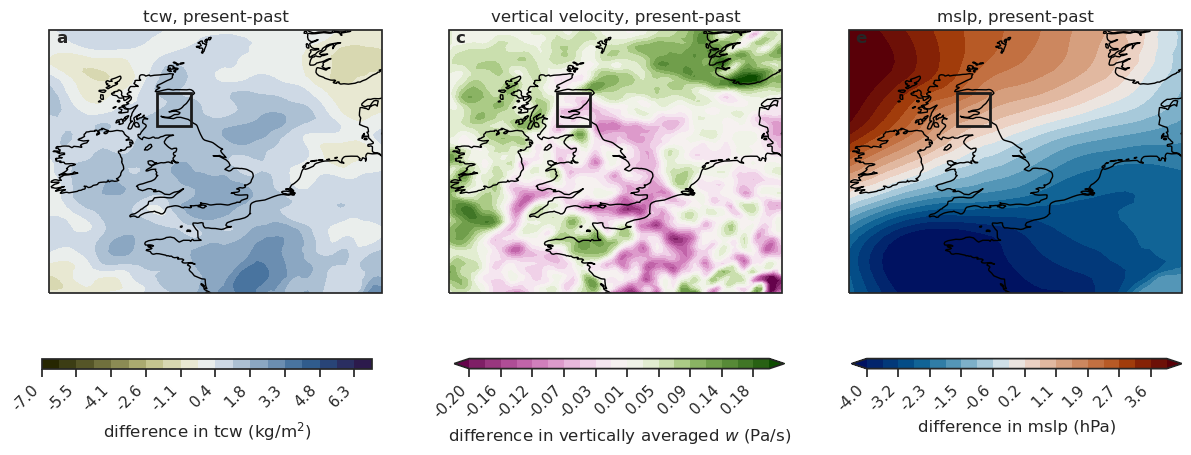

In [7]:
# Create figure
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 5), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot saturation specific humidity
vmax = 7
plot1 = (era5_dynamics.sel(climate='present')-era5_dynamics.sel(climate='1950')).tcw.plot.contourf(
    cmap=cm.broc_r, vmin=-1*vmax, vmax=vmax,
    levels=20, ax=axes[0], add_colorbar=False  # Disable individual colorbars
)

# Plot vertical velocity
vmax = 0.2
plot3 = (era5_dynamics.sel(climate='present')-era5_dynamics.sel(climate='1950')).w.plot.contourf(
    cmap=cm.bam, vmin=-1*vmax, vmax=vmax,
    levels=20, ax=axes[1], add_colorbar=False  # Disable individual colorbars
)
# Plot mean sea level pressure
vmax = 4
plot5 = ((era5_analogues.sel(climate='present')-era5_analogues.sel(climate='1950')).msl/100).plot.contourf(
    cmap=cm.vik, vmin=-1*vmax, vmax=vmax,
    levels=20, ax=axes[2], add_colorbar=False  # Disable individual colorbars
)

# Add horizontal colorbars
cbar_ax1 = fig.add_axes([0.12, 0.08, 0.22, 0.02])  # Bottom of first column
cbar1 = fig.colorbar(plot1, cax=cbar_ax1, orientation="horizontal", label="difference in tcw (kg/m$^2$)")
cbar1.ax.xaxis.set_label_position('bottom')
cbar1.formatter = FormatStrFormatter("%.1f")  # Restrict to 2 decimal places
cbar1.update_ticks()

cbar_ax2 = fig.add_axes([0.395, 0.08, 0.22, 0.02])  # Bottom of second column
cbar2 = fig.colorbar(plot3, cax=cbar_ax2, orientation="horizontal", label=r"difference in vertically averaged $w$ (Pa/s)")
cbar2.ax.xaxis.set_label_position('bottom')
cbar2.formatter = FormatStrFormatter("%.2f")  # Restrict to 2 decimal places
cbar2.update_ticks()

cbar_ax3 = fig.add_axes([0.66, 0.08, 0.22, 0.02])  # Bottom of third column
cbar3 = fig.colorbar(plot5, cax=cbar_ax3, orientation="horizontal", label="difference in mslp (hPa)")
cbar3.ax.xaxis.set_label_position('bottom')
cbar3.formatter = FormatStrFormatter("%.1f")  # Restrict to 2 decimal places
cbar3.update_ticks()

for cbar in [cbar1, cbar2, cbar3]:  
    for label in cbar.ax.get_xticklabels():  # For horizontal colorbars  
        label.set_rotation(45)  
        label.set_ha('right')  # Align labels to the right for better readability


# Add figure labels
axes[0].text(0.02, 0.95, "a", transform=axes[0].transAxes, fontsize=12, fontweight="bold")
axes[1].text(0.02, 0.95, "c", transform=axes[1].transAxes, fontsize=12, fontweight="bold")
axes[2].text(0.02, 0.95, "e", transform=axes[2].transAxes, fontsize=12, fontweight="bold")

# Apply Cartopy settings to both axes
titles = [f"tcw, present-past", f"vertical velocity, present-past", f"mslp, present-past"]
for ax, title in zip(axes.flatten(), titles):
    ax.set_extent(uk, crs=ccrs.PlateCarree())  # Set map extent
    ax.add_feature(cfeature.LAND, edgecolor='black', linewidth=0.8)  # Add land borders
    ax.add_feature(cfeature.OCEAN, facecolor='white')  # Mask ocean
    ax.coastlines()  # Add coastlines
    ax.set_title(title, fontsize=12)  # Set

    rectangle = patches.Rectangle((-4, 55.5), 2, 2, linewidth=2, 
                                edgecolor='k', 
                                facecolor='none',
                                transform=ccrs.PlateCarree())
    ax.add_patch(rectangle)
    rectangle.set_zorder(17)
plt.subplots_adjust(right=0.88)

# Save the figure
plt.savefig('figures/PAPER8_era5_dynamics.png', dpi=600, bbox_inches='tight')
plt.savefig('figures/PAPER8_era5_dynamics.pdf')